# **Tugas Submission Dicoding Machine Learning**

Convolutional Neural Network untuk memprediksi tangan yang membentuk Paper Rock dan Scissor

Nama : Aldiva Wibowo

Email : Aldivaavalon@gmail.com

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil #operasi tingkat tinggi file
import os 
import zipfile
print(tf.__version__) #versi TensorFlow

2.4.1


In [2]:
path = '/tmp/rockpaperscissors/'
    
isFile = os.path.isfile(path)  
print(isFile) 

False


In [3]:
if isFile == True:
  shutil.rmtree('/tmp/rockpaperscissors/', ignore_errors=False, oneerror=None)
else:
  print('skipped')

skipped


In [4]:
!wget --no-check-certificate / https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

/: Scheme missing.
--2021-04-26 04:57:18--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.2’

rockpaperscissors.z 100%[===================>] 307.92M  2.50MB/s    in 2m 52s  

2021-04-26 05:00:11 (1.79 MB/s) - ‘rockpaperscissors.zip.2’ saved [322873683/322873683]

FINISHED --2021-04-26 05:00:11--
Total wall clock time: 2m 53s
Downloaded: 1 files, 308M in 2m 52s (1.79 MB/s)


In [5]:
# Ekstrak File

local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
base_dir = '/tmp/rockpaperscissors/'
train_dir = os.path.join(base_dir, 'rps-cv-images')

In [6]:
os.listdir(base_dir)

['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors', 'rps-cv-images']

In [7]:
os.listdir(train_dir)

['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split = 0.4)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                        shear_range = 0.2,
                                        horizontal_flip = True,
                                        validation_split = 0.4)


In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 4,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = validation_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 4,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') 
])

In [11]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.RMSprop(),
             metrics = ['accuracy'])

In [22]:
model.fit(
    train_generator,
    epochs=20,
    validation_data = validation_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/20
329/329 - 9s - loss: 0.1705 - accuracy: 0.9772 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 2/20
329/329 - 9s - loss: 0.1229 - accuracy: 0.9810 - val_loss: 1.0290e-04 - val_accuracy: 1.0000
Epoch 3/20
329/329 - 9s - loss: 0.0656 - accuracy: 0.9909 - val_loss: 2.3842e-08 - val_accuracy: 1.0000
Epoch 4/20
329/329 - 9s - loss: 0.1686 - accuracy: 0.9848 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
329/329 - 9s - loss: 0.1844 - accuracy: 0.9795 - val_loss: 0.0869 - val_accuracy: 0.9500
Epoch 6/20
329/329 - 9s - loss: 0.1580 - accuracy: 0.9802 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 7/20
329/329 - 9s - loss: 0.0979 - accuracy: 0.9810 - val_loss: 1.5660e-04 - val_accuracy: 1.0000
Epoch 8/20
329/329 - 9s - loss: 0.2075 - accuracy: 0.9779 - val_loss: 1.1086e-06 - val_accuracy: 1.0000
Epoch 9/20
329/329 - 9s - loss: 0.1424 - accuracy: 0.9795 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 10/20
329/329 - 9s - loss: 0.0982 - accuracy: 0.9855 - val_loss: 7.1526e-0

Saving 1WuMUpzupKs67q29.png to 1WuMUpzupKs67q29 (3).png

Prediksi Paper|Rock|Scissors
1WuMUpzupKs67q29.png
[[0. 1. 0.]]
Batu


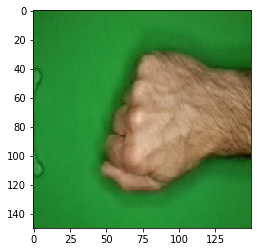

In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

   #prediksi gambar
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  paper     = "[[1. 0. 0.]]"
  rock      = "[[0. 1. 0.]]"
  scissors  = "[[0. 0. 1.]]"

  imgs = np.array_str(classes) 

  print('\nPrediksi Paper|Rock|Scissors')
  print(fn)
  print(imgs)

  if imgs == paper :
    print("Kertas")
  elif imgs == rock :
    print("Batu")
  elif imgs == scissors :
    print("Gunting")